In [2]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import glob

plt.style.use("dark_background")


In [3]:
def extract(df):
    in_flocks = []
    angles = []
    
    for frame in range(max(df["frame"])):
        in_flocks.append(df["image_index"][(df["frame"]==frame) & (df["image_index"]==1)].count())

        angle = np.array(list(df["angle"][df["frame"]==frame])).reshape(-1, 1)
        angles.append(angle)
        
    return in_flocks, angles


def extract_cluster(df):
    clusters = []
    
    for frame in tqdm(range(max(df["frame"]))):
        scores = []
        ds = df[["x","y"]][df["frame"]==frame].to_numpy()
        for k in range(2, 50):
            model = KMeans(n_clusters=k)
            model.fit(ds)
            pred = model.predict(ds)
            scores.append(silhouette_score(ds, pred))
        clusters.append(np.argmax(scores)+2)
        
    return clusters



In [4]:
def moving_average(x, n=10, or_dim = 600) :
    ret = np.cumsum(x, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    add = 600-len(ret[n - 1:]) if len(ret[n - 1:])<or_dim else 0
    ins = [0]*add
    fin = np.concatenate((np.array(ins),ret[n - 1:]),axis = None)
    return fin / n

In [5]:
def plot_flock_p(in_flocks, name,r = 600):
    fig, ax = plt.subplots()

    #ax.vlines(162,-1,2,colors = "r")
    #ax.vlines(337,-1,2,colors = "r")
    #ax.vlines(446,-1,2,colors = "r")
    fp = [x/50 for x in in_flocks]
    ax.plot(range(r), fp)
    ax.plot(range(r), moving_average(np.array(fp),60))

    ax.set_title("Percentage of Birds in a Flock over Time")
    ax.set_ylabel("Percentahe of birds in a flock")
    ax.set_xlabel("Frame")
   
    ax.set_facecolor("#202020")
    plt.ylim([0,1])

    plt.savefig(f"plots/flock_{name}.png",dpi=300, transparent = True)

In [6]:
def plot_cluster(clusters,r = 600):
    
    fig, ax = plt.subplots()
    m = max(clusters)
    #ax.vlines(162,-2,m+2,colors = "r")
    #ax.vlines(337,-1,m+2,colors = "r")
    #ax.vlines(446,-1,m+2,colors = "r")


    
    ax.plot(range(r),moving_average(np.array(clusters),n = 60) ,color = "g")
    ax.plot(range(r),moving_average(np.array(clusters)), color = "purple")
    ax.plot(range(r),np.array(clusters))
    
    ax.set_title("Clusters per Frame")
    ax.set_ylabel("Amount of Clusters")
    ax.set_xlabel("Frame")

    plt.ylim([2,m])
    plt.savefig(f"plots/cluster_{name}.png",dpi=300, transparent = True)


 83%|████████▎ | 20/24 [00:08<00:01,  2.58it/s]C:\Users\CE2C3~1.GRE\AppData\Local\Temp/ipykernel_35072/2405774776.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
100%|██████████| 24/24 [00:09<00:00,  2.49it/s]


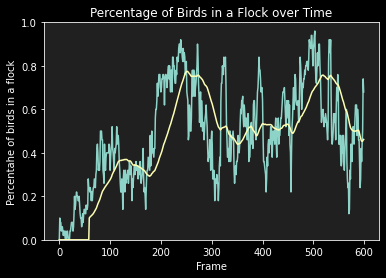

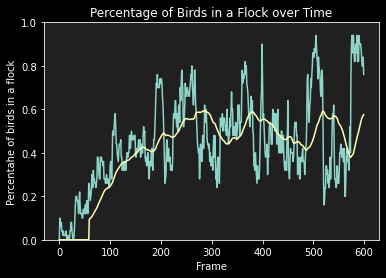

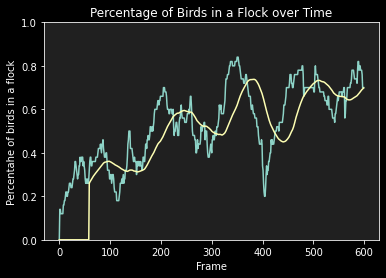

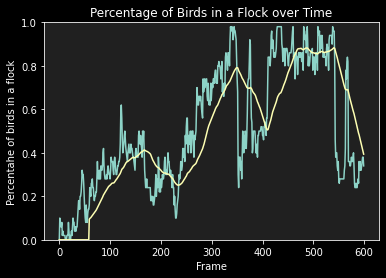

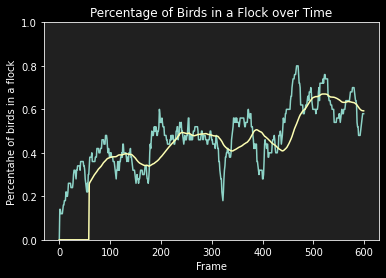

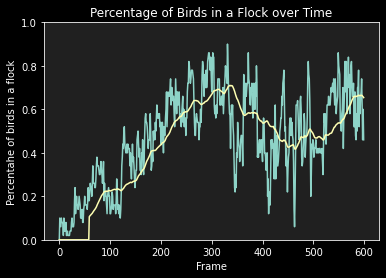

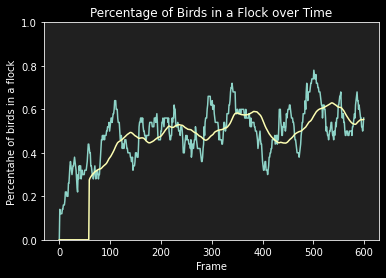

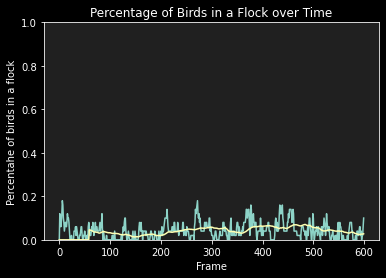

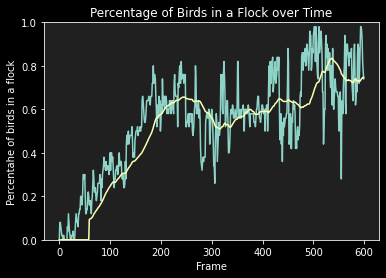

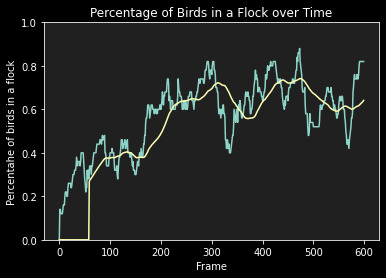

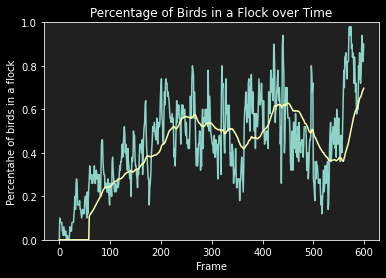

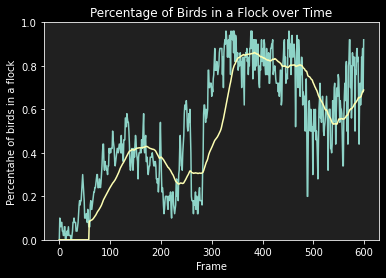

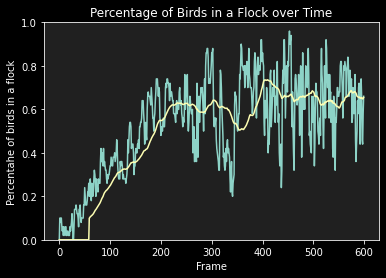

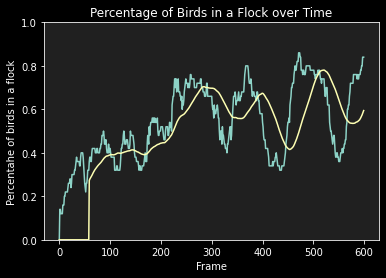

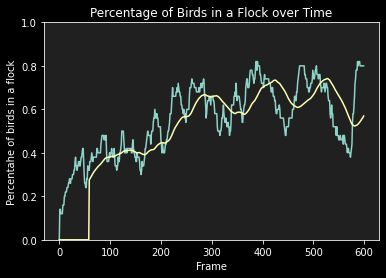

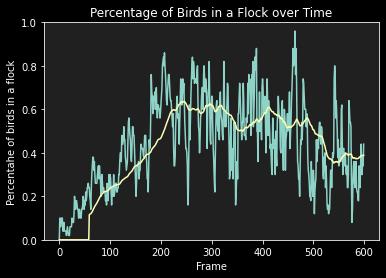

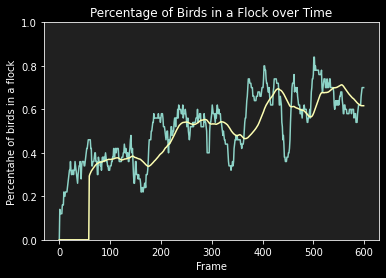

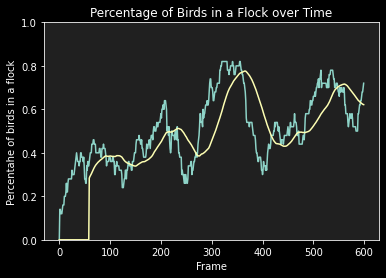

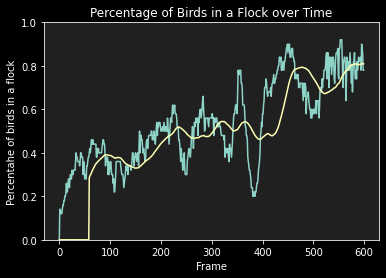

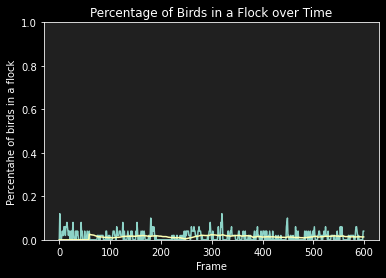

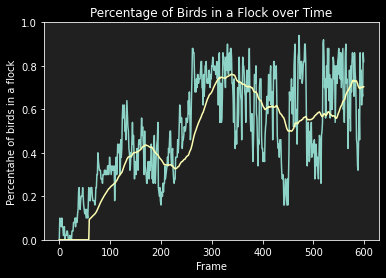

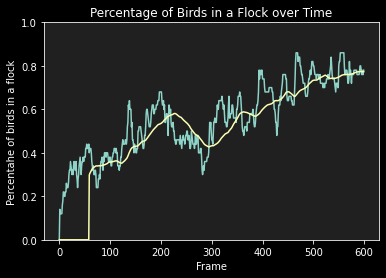

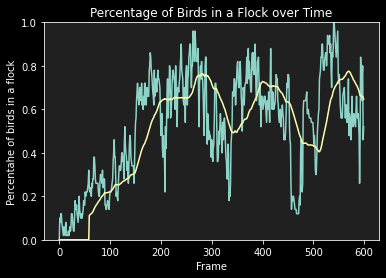

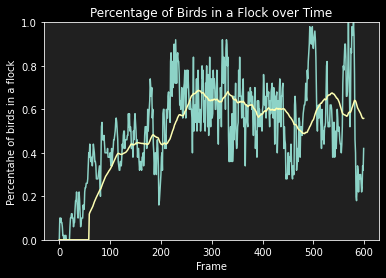

In [7]:
experiments = glob.glob("Experiments/*.csv")
score = []
for ex in tqdm(experiments):
    name = ex[12:-4]
    df = pd.read_csv(ex)
    
    in_flocks, angles = extract(df)
    score.append(np.average(in_flocks))
    plot_flock_p(in_flocks, name,max(df["frame"]))
    
i = np.argmax(score)
max_s = pd.read_csv(experiments[i])

In [9]:
print(score)
print(experiments[np.argmax(score)])

[24.268333333333334, 22.565, 26.381666666666668, 25.388333333333332, 23.388333333333332, 23.566666666666666, 24.571666666666665, 2.1333333333333333, 27.176666666666666, 28.308333333333334, 22.426666666666666, 26.0, 26.44, 26.823333333333334, 27.515, 21.988333333333333, 25.60333333333333, 28.815, 26.763333333333332, 0.7833333333333333, 25.036666666666665, 27.783333333333335, 26.385, 25.703333333333333]
Experiments\A0.80_C0.20_S0.20_W0.30.csv


100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [32:50<00:00,  3.28s/it]


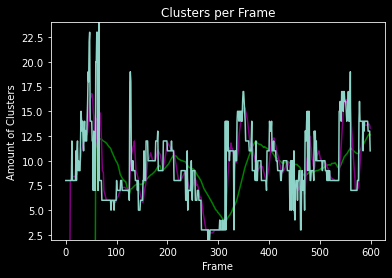

In [15]:
clusters = extract_cluster(max_s)
plot_cluster(clusters,max(max_s["frame"]))